In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"]).set_index("date")

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df = df.drop(df[df["value"].quantile(0.025) > df["value"]].index)

In [5]:
df = df.drop(df[df["value"].quantile(0.975) < df["value"]].index)

In [6]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


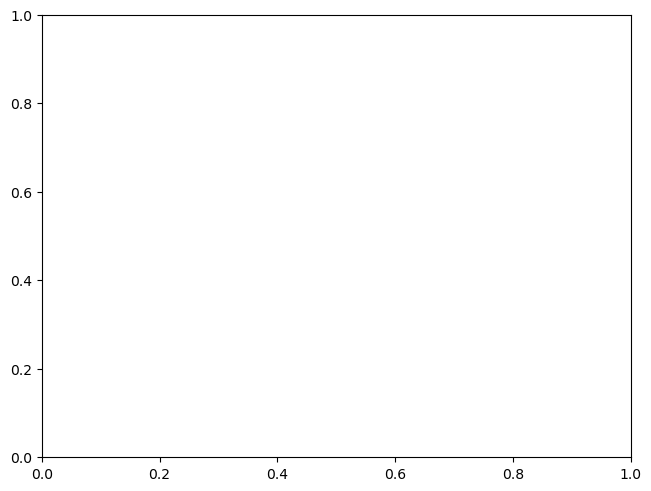

In [7]:
fig, ax = plt.subplots(layout="constrained")

In [8]:
import matplotlib.dates as mdates

In [9]:
#None of these really work
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)

In [10]:
from matplotlib.dates import (MONTHLY, DateFormatter, RRuleLocator, rrulewrapper)

In [11]:
#These don't work either
#rule = rrulewrapper(MONTHLY, bymonthday=1, interval=6, count=8)
#loc = RRuleLocator(rule)
#formatter = DateFormatter('%y-%m')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019.')

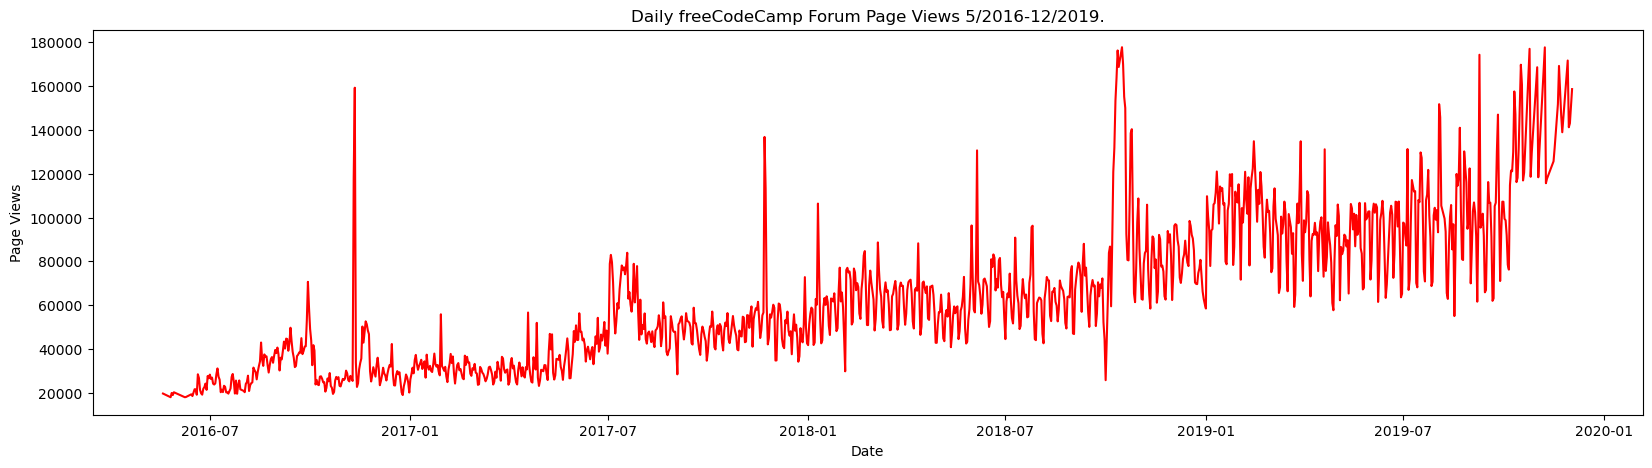

In [12]:
plt.figure(figsize = (20,5), dpi=100)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.plot(df, color="red")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")


In [13]:
df_bar = df.copy()

In [14]:
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [15]:
df_barbymonth = df_bar.resample("m").mean()

In [33]:
df_barbymonth.index.strftime("%Y-%b")

Index(['2016-May', '2016-Jun', '2016-Jul', '2016-Aug', '2016-Sep', '2016-Oct',
       '2016-Nov', '2016-Dec', '2017-Jan', '2017-Feb', '2017-Mar', '2017-Apr',
       '2017-May', '2017-Jun', '2017-Jul', '2017-Aug', '2017-Sep', '2017-Oct',
       '2017-Nov', '2017-Dec', '2018-Jan', '2018-Feb', '2018-Mar', '2018-Apr',
       '2018-May', '2018-Jun', '2018-Jul', '2018-Aug', '2018-Sep', '2018-Oct',
       '2018-Nov', '2018-Dec', '2019-Jan', '2019-Feb', '2019-Mar', '2019-Apr',
       '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct',
       '2019-Nov', '2019-Dec'],
      dtype='object', name='date')

In [17]:
months = ["January",  "February", "March","April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_barbymonth['months'] = pd.Categorical(df_barbymonth.index.strftime('%B'), categories=months, ordered=True)

dfp = pd.pivot_table(data=df_barbymonth, index=pd.DatetimeIndex(data=df_barbymonth.index).strftime("%Y"), columns='months', values='value')

In [18]:
dfp

months,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,113663.275862,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


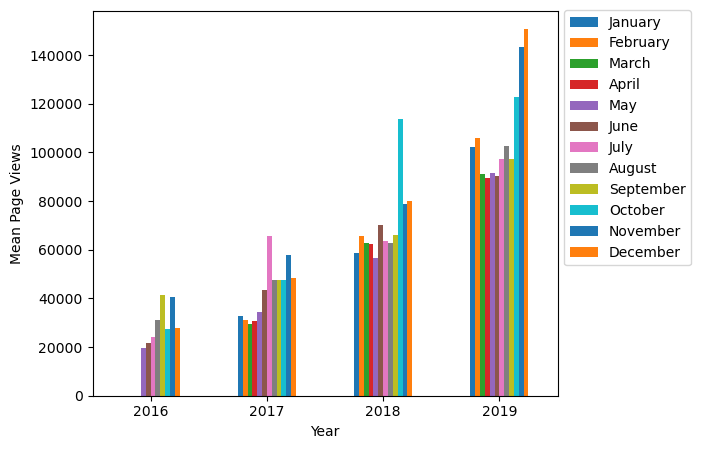

In [19]:
ax = dfp.plot(kind='bar', figsize=(6, 5), ylabel='Mean Page Views', xlabel='Year', rot=0)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc="upper left")
plt.show()

In [20]:
dfformatted = pd.DatetimeIndex(data=df_barbymonth.index).strftime("%Y-%B")

In [21]:
df_clean = df_barbymonth.set_index(dfformatted)

In [22]:
df_clean

,value,months
date,,
2016-May,19432.400000,May
2016-June,21875.105263,June
2016-July,24109.678571,July
2016-August,31049.193548,August
2016-September,41476.866667,September
2016-October,27398.322581,October
2016-November,40448.633333,November
2016-December,27832.419355,December
2017-January,32785.161290,January


In [23]:
dfh = pd.pivot_table(df_clean, values="value",index="date", aggfunc="sum")

In [24]:
dfh

,value
date,
2016-August,31049.193548
2016-December,27832.419355
2016-July,24109.678571
2016-June,21875.105263
2016-May,19432.400000
2016-November,40448.633333
2016-October,27398.322581
2016-September,41476.866667
2017-April,30878.733333


In [25]:
dfh.index = pd.to_datetime(dfh.index, format='%Y-%B')

In [26]:
dfh.index = dfh.index.strftime('%Y-%b')

In [27]:
dfh.index

Index(['2016-Aug', '2016-Dec', '2016-Jul', '2016-Jun', '2016-May', '2016-Nov',
       '2016-Oct', '2016-Sep', '2017-Apr', '2017-Aug', '2017-Dec', '2017-Feb',
       '2017-Jan', '2017-Jul', '2017-Jun', '2017-Mar', '2017-May', '2017-Nov',
       '2017-Oct', '2017-Sep', '2018-Apr', '2018-Aug', '2018-Dec', '2018-Feb',
       '2018-Jan', '2018-Jul', '2018-Jun', '2018-Mar', '2018-May', '2018-Nov',
       '2018-Oct', '2018-Sep', '2019-Apr', '2019-Aug', '2019-Dec', '2019-Feb',
       '2019-Jan', '2019-Jul', '2019-Jun', '2019-Mar', '2019-May', '2019-Nov',
       '2019-Oct', '2019-Sep'],
      dtype='object', name='date')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019.')

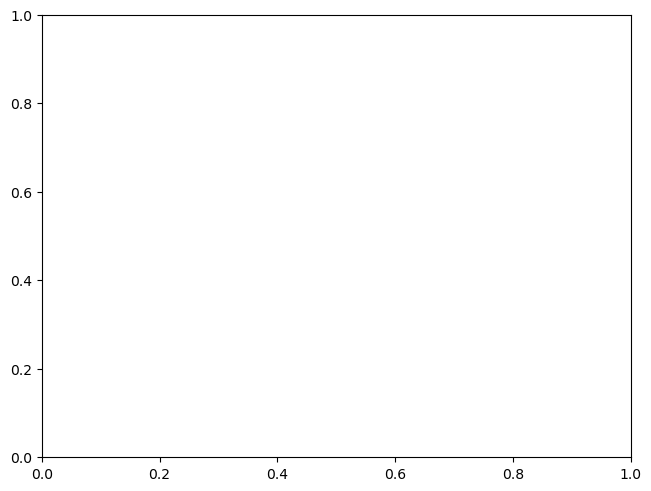

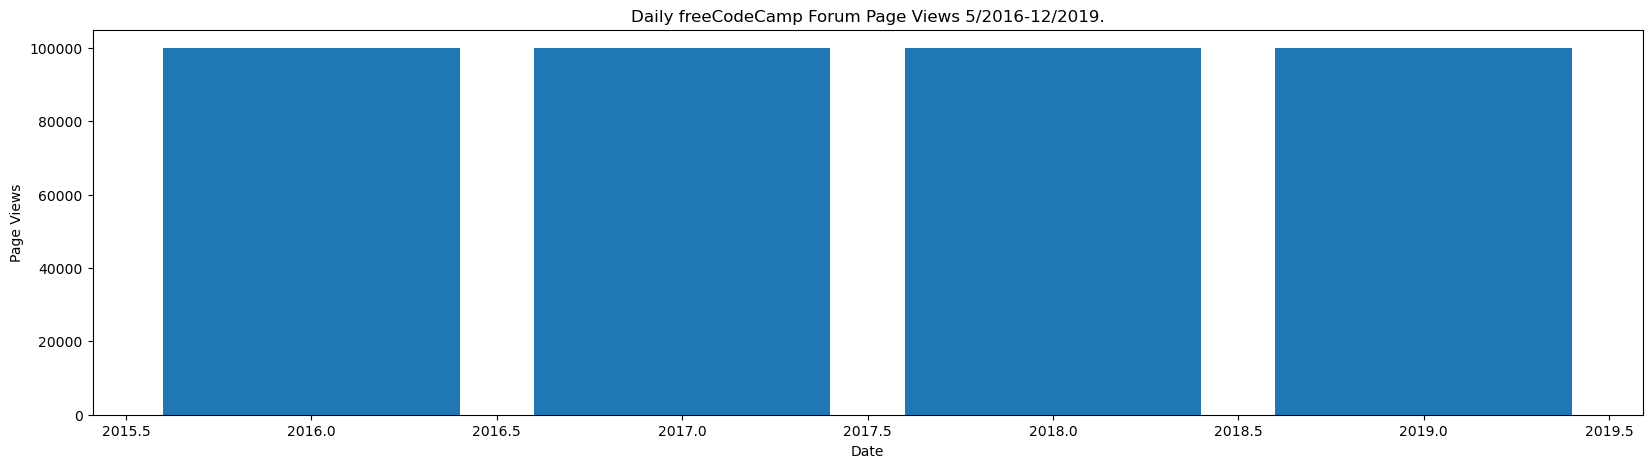

In [29]:
fig, ax = plt.subplots(layout="constrained")
plt.figure(figsize = (20,5), dpi=100)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.bar(x=[2016, 2017, 2018, 2019], height=99999,data=df_clean)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")

In [30]:
df.index = df.index.strftime("%Y")

In [31]:
df.index

Index(['2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016',
       '2016',
       ...
       '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019',
       '2019'],
      dtype='object', name='date', length=1239)

In [32]:
df_year = pd.pivot_table(data=df, values="value", index=df.index, aggfunc="sum")

In [33]:
df_year

,value
date,
2016,6320303
2017,15736295
2018,25361698
2019,30827814


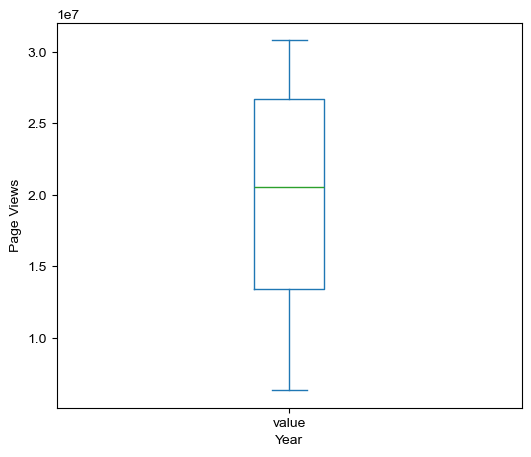

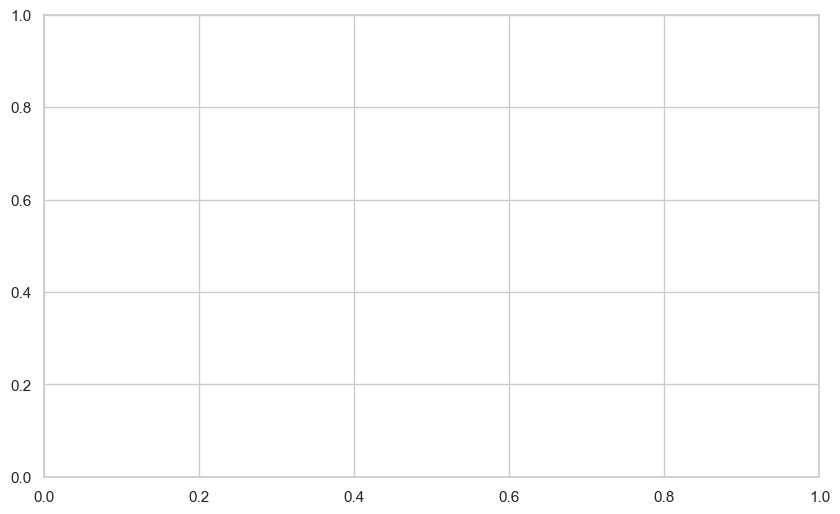

In [34]:
ax = df_year.plot(kind='box', figsize=(6, 5), ylabel='Page Views', xlabel='Year')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style="plain", axis="y")
plt.show()

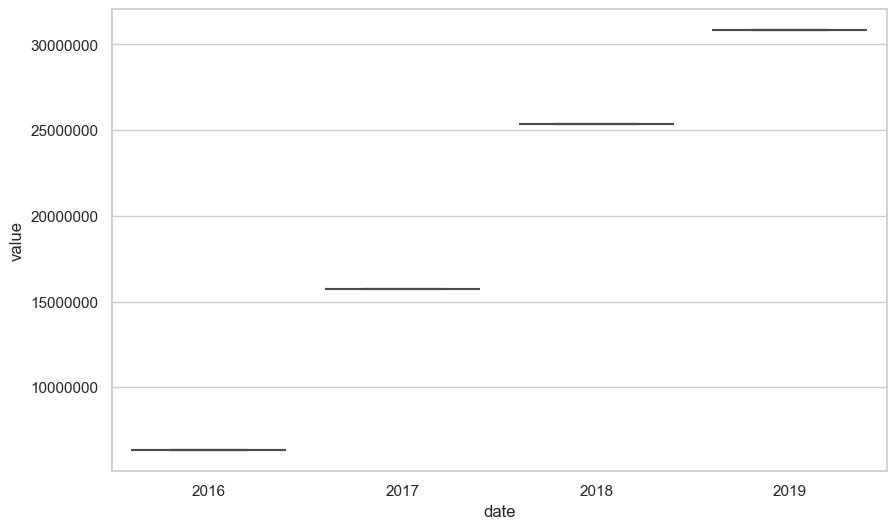

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_year.index, y='value', data=df_year)

plt.ticklabel_format(style='plain', axis="y")

plt.show()

In [36]:
df.index = pd.to_datetime(df.index)

In [37]:
df['year'] = df.index.year

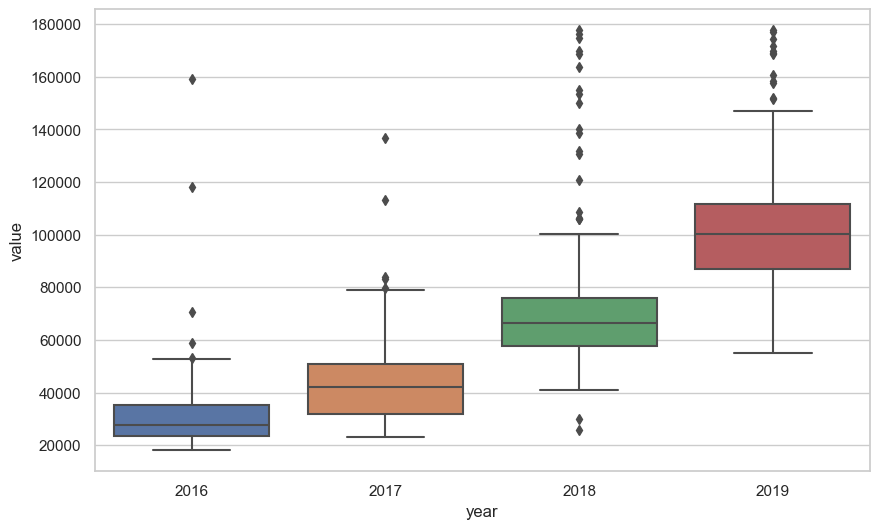

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='value', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
dfh.in

In [37]:
dfh.index

DatetimeIndex(['2016-08-01', '2016-12-01', '2016-07-01', '2016-06-01',
               '2016-05-01', '2016-11-01', '2016-10-01', '2016-09-01',
               '2017-04-01', '2017-08-01', '2017-12-01', '2017-02-01',
               '2017-01-01', '2017-07-01', '2017-06-01', '2017-03-01',
               '2017-05-01', '2017-11-01', '2017-10-01', '2017-09-01',
               '2018-04-01', '2018-08-01', '2018-12-01', '2018-02-01',
               '2018-01-01', '2018-07-01', '2018-06-01', '2018-03-01',
               '2018-05-01', '2018-11-01', '2018-10-01', '2018-09-01',
               '2019-04-01', '2019-08-01', '2019-12-01', '2019-02-01',
               '2019-01-01', '2019-07-01', '2019-06-01', '2019-03-01',
               '2019-05-01', '2019-11-01', '2019-10-01', '2019-09-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [34]:
df_box = dfh.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]

In [38]:
df_box

,date,value,year,month
0,2016-08-01,31049.193548,2016,8
1,2016-12-01,27832.419355,2016,12
2,2016-07-01,24109.678571,2016,7
3,2016-06-01,21875.105263,2016,6
4,2016-05-01,19432.400000,2016,5
5,2016-11-01,40448.633333,2016,11
6,2016-10-01,27398.322581,2016,10
7,2016-09-01,41476.866667,2016,9
8,2017-04-01,30878.733333,2017,4
9,2017-08-01,47712.451613,2017,8


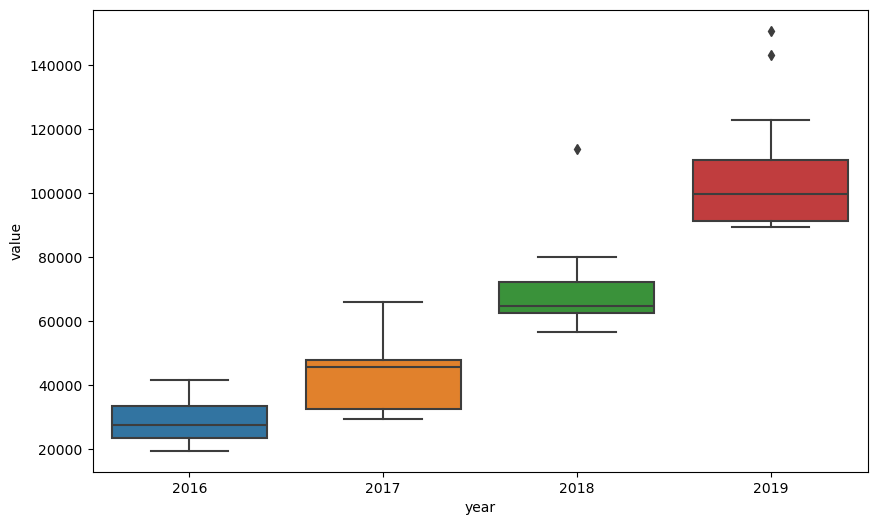

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='value', data=df_box)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

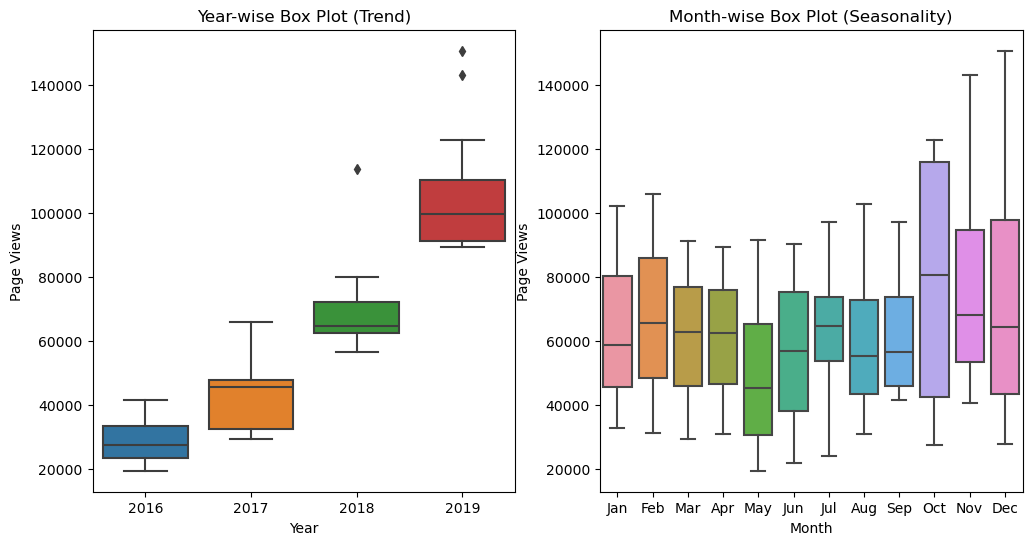

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', data=df_box)
axes[1] = plt.xlabel('Month')
axes[1] = plt.xticks(ticks=plt.xticks()[0], labels=month_labels)
axes[1] = plt.ylabel('Page Views')
axes[1] = plt.title('Month-wise Box Plot (Seasonality)')

In [ ]:
df_box